### Experimento para la búsqueda de la solución de la ecuación diferencial de la divergencia de u por diferencias finitas

#### I - Grilla de 5 x 5:

In [2]:
# Importa librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

Convergencia alcanzada en 63 iteraciones.


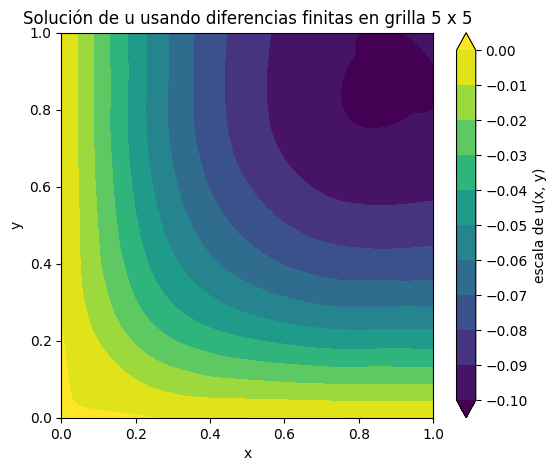

In [4]:
# Define el tamaño de la grilla
N = 5
L = 1.0
dx = L / (N - 1)
dy = L / (N - 1)

# Parámetros de iteración
tolerancia = 1e-6
max_iter = 10000

# Inicializa el campo u
u = np.zeros((N, N))

# Condiciones de frontera
# u(0, y) = u(x, 0) = 0 (ya está implícito con la inicialización en cero)

# Bucle de iteración Gauss-Seidel
for iter_count in range(max_iter):
    u_old = np.copy(u)
    
    # Actualización de los valores internos de la grilla
    for i in range(1, N-1):
        for j in range(1, N-1):
            u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] -  dx**2*0.5*np.exp(u[i, j]))
    
    # Condiciones de frontera derivativas (bordes derecho y superior, Neumann)
    # ∂u/∂x en x = 1 -> u(1, j) ≈ u(N-1, j) = u(N-2, j)
    u[N-1, :] = u[N-2, :]
    
    # ∂u/∂y en y = 1 -> u(i, 1) ≈ u(i, N-1) = u(i, N-2)
    u[:, N-1] = u[:, N-2]

    # Criterio de convergencia
    error = np.linalg.norm(u - u_old)
    if error < tolerancia:
        print(f"Convergencia alcanzada en {iter_count} iteraciones.")
        break
else:
    print("El método no ha convergido en el número máximo de iteraciones.")

# Almacena la solución en una matriz
u_DF_5x5 = u

# Crea las coordenadas para x e y
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Crea una grilla más densa de 1000x1000 para interpolación
x_dense = np.linspace(0, L, 1000)
y_dense = np.linspace(0, L, 1000)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)

# Interpolación de u en la grilla densa
u_dense = griddata((X.flatten(), Y.flatten()), u.flatten(), (X_dense, Y_dense), method='cubic')

# Genera el gráfico interpolado
plt.figure(figsize=(6, 5))
cp = plt.contourf(X_dense, Y_dense, u_dense, cmap='viridis', levels=[-0.10, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.10, vmax=0.00, extend='both')
plt.colorbar(cp, label='escala de u(x, y)', extend='both', ticks=[-0.10, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title('Solución de u usando diferencias finitas en grilla 5 x 5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Borra la solución para poder ser usada en los siguientes experimentos
del u

#### II - Grilla de 10 x 10:

Convergencia alcanzada en 302 iteraciones.


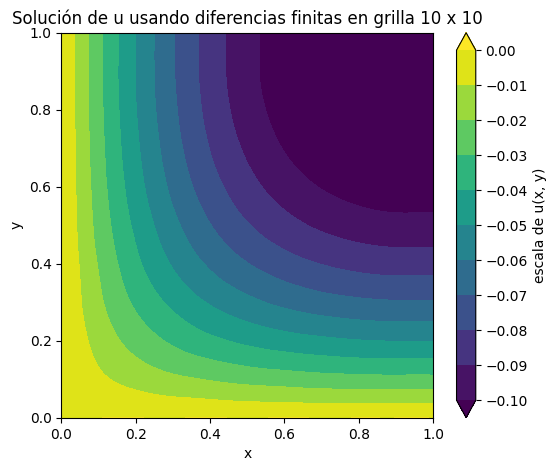

In [5]:
# Define el tamaño de la grilla
N = 10
L = 1.0
dx = L / (N - 1)
dy = L / (N - 1)

# Parámetros de iteración
tolerancia = 1e-6
max_iter = 10000

# Inicializa el campo u
u = np.zeros((N, N))

# Condiciones de frontera
# u(0, y) = u(x, 0) = 0 (ya está implícito con la inicialización en cero)

# Bucle de iteración Gauss-Seidel
for iter_count in range(max_iter):
    u_old = np.copy(u)
    
    # Actualización de los valores internos de la grilla
    for i in range(1, N-1):
        for j in range(1, N-1):
            u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] -  dx**2*0.5*np.exp(u[i, j]))
    
    # Condiciones de frontera derivativas (bordes derecho y superior, Neumann)
    # ∂u/∂x en x = 1 -> u(1, j) ≈ u(N-1, j) = u(N-2, j)
    u[N-1, :] = u[N-2, :]
    
    # ∂u/∂y en y = 1 -> u(i, 1) ≈ u(i, N-1) = u(i, N-2)
    u[:, N-1] = u[:, N-2]

    # Criterio de convergencia
    error = np.linalg.norm(u - u_old)
    if error < tolerancia:
        print(f"Convergencia alcanzada en {iter_count} iteraciones.")
        break
else:
    print("El método no ha convergido en el número máximo de iteraciones.")

# Almacena la solución en una matriz
u_DF_10x10 = u

# Crea las coordenadas para x e y
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Crea una grilla más densa de 1000x1000 para interpolación
x_dense = np.linspace(0, L, 1000)
y_dense = np.linspace(0, L, 1000)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)

# Interpolación de u en la grilla densa
u_dense = griddata((X.flatten(), Y.flatten()), u.flatten(), (X_dense, Y_dense), method='cubic')

# Genera el gráfico interpolado
plt.figure(figsize=(6, 5))
cp = plt.contourf(X_dense, Y_dense, u_dense, cmap='viridis', levels=[-0.10, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.10, vmax=0.00, extend='both')
plt.colorbar(cp, label='escala de u(x, y)', extend='both', ticks=[-0.10, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title('Solución de u usando diferencias finitas en grilla 10 x 10')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Borra la solución para poder ser usada en los siguientes experimentos
del u

#### III - Grilla de 20 x 20:

Convergencia alcanzada en 1247 iteraciones.


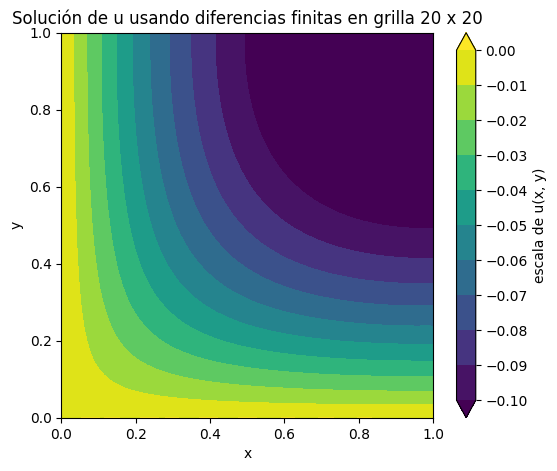

In [6]:
# Define el tamaño de la grilla
N = 20
L = 1.0
dx = L / (N - 1)
dy = L / (N - 1)

# Parámetros de iteración
tolerancia = 1e-6
max_iter = 10000

# Inicializa el campo u
u = np.zeros((N, N))

# Condiciones de frontera
# u(0, y) = u(x, 0) = 0 (ya está implícito con la inicialización en cero)

# Bucle de iteración Gauss-Seidel
for iter_count in range(max_iter):
    u_old = np.copy(u)
    
    # Actualización de los valores internos de la grilla
    for i in range(1, N-1):
        for j in range(1, N-1):
            u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] -  dx**2*0.5*np.exp(u[i, j]))
    
    # Condiciones de frontera derivativas (bordes derecho y superior, Neumann)
    # ∂u/∂x en x = 1 -> u(1, j) ≈ u(N-1, j) = u(N-2, j)
    u[N-1, :] = u[N-2, :]
    
    # ∂u/∂y en y = 1 -> u(i, 1) ≈ u(i, N-1) = u(i, N-2)
    u[:, N-1] = u[:, N-2]

    # Criterio de convergencia
    error = np.linalg.norm(u - u_old)
    if error < tolerancia:
        print(f"Convergencia alcanzada en {iter_count} iteraciones.")
        break
else:
    print("El método no ha convergido en el número máximo de iteraciones.")

# Almacena la solución en una matriz
u_DF_20x20 = u

# Crea las coordenadas para x e y
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Crea una grilla más densa de 1000x1000 para interpolación
x_dense = np.linspace(0, L, 1000)
y_dense = np.linspace(0, L, 1000)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)

# Interpolación de u en la grilla densa
u_dense = griddata((X.flatten(), Y.flatten()), u.flatten(), (X_dense, Y_dense), method='cubic')

# Genera el gráfico interpolado
plt.figure(figsize=(6, 5))
cp = plt.contourf(X_dense, Y_dense, u_dense, cmap='viridis', levels=[-0.10, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.10, vmax=0.00, extend='both')
plt.colorbar(cp, label='escala de u(x, y)', extend='both', ticks=[-0.10, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title('Solución de u usando diferencias finitas en grilla 20 x 20')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Borra la solución para poder ser usada en los siguientes experimentos
del u